In [1]:
import keras
from keras.datasets import mnist
from keras.utils import np_utils


Using TensorFlow backend.


In [2]:
(X_TRAIN,Y_TRAIN),(X_TEST,Y_TEST)= mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
(X_TRAIN.shape,Y_TRAIN.shape),(X_TEST.shape,Y_TEST.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [0]:
from keras import backend as K

In [5]:
K.image_data_format()

'channels_last'

In [6]:
X_TRAIN = X_TRAIN.reshape(X_TRAIN.shape[0],28,28,1)
X_TEST = X_TEST.reshape(X_TEST.shape[0],28,28,1)
print(X_TRAIN.shape,X_TEST.shape)
X_TRAIN =X_TRAIN.astype('float32')
X_TEST = X_TEST.astype('float32')
X_TRAIN = X_TRAIN/255
X_TEST= X_TEST/255

Y_TRAIN = np_utils.to_categorical(Y_TRAIN,10)
Y_TEST = np_utils.to_categorical(Y_TEST,10)


(60000, 28, 28, 1) (10000, 28, 28, 1)


# MODEL:1

Filter_1:32

FIlter_2 :64

Kerenel_size=3X3

Activation Function: Relu

Optimizers: Adam

Two conv layers followed by dense layer of 10 neuron having softmax activation function. 

In [0]:
#MODEL.add(MaxPooling2D(pool_size=(2,2)))
#MODEL.add(Dropout(2.5))
#MODEL.add(Flatten())

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Dense,Dropout,Flatten
from keras.layers.normalization import BatchNormalization

In [0]:
def PLOT(val_loss,train_loss):
  import matplotlib.pyplot as plt
  X= list(range(1,13))
  plt.plot(X,val_loss,'b',label="Validation loss")
  plt.plot(X,train_loss,'r',label='Train loss')
  plt.legend()
  plt.grid()
  plt.xlabel("Number of Epoch")
  plt.ylabel('Cross Entropy Loss')


In [0]:
MODEL = Sequential()
MODEL.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
MODEL.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
MODEL.add(Flatten())
MODEL.add(Dense(10,activation = 'softmax'))

In [0]:
MODEL.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [0]:
HISTORY=MODEL.fit(X_TRAIN,Y_TRAIN,batch_size= 128,epochs=12,verbose=1,validation_data=(X_TEST,Y_TEST))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 131s 2ms/step - loss: 0.1734 - acc: 0.9498 - val_loss: 0.0587 - val_acc: 0.9819
Epoch 2/12
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0541 - acc: 0.9835 - val_loss: 0.0476 - val_acc: 0.9857
Epoch 3/12
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0364 - acc: 0.9887 - val_loss: 0.0441 - val_acc: 0.9869
Epoch 4/12
60000/60000 [==============================] - 132s 2ms/step - loss: 0.0272 - acc: 0.9914 - val_loss: 0.0351 - val_acc: 0.9890
Epoch 5/12
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0199 - acc: 0.9935 - val_loss: 0.0436 - val_acc: 0.9863
Epoch 6/12
60000/60000 [==============================] - 132s 2ms/step - loss: 0.0138 - acc: 0.9956 - val_loss: 0.0468 - val_acc: 0.9858
Epoch 7/12
60000/60000 [==============================] - 132s 2ms/step - loss: 0.0105 - acc: 0.9966 - val_loss: 0.0455 - 

Test loss: 0.06543933505496034
Test accuracy: 0.9856


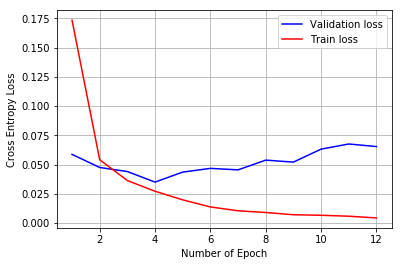

In [0]:
TEST_LOSS=[]
score = MODEL.evaluate(X_TEST, Y_TEST, verbose=0)
TEST_LOSS.append(score[0])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

import matplotlib.pyplot as plt
TRAIN_LOSS = HISTORY.history['loss']
VAL_LOSS = HISTORY.history['val_loss']
PLOT(VAL_LOSS,TRAIN_LOSS)

# MODEL_2 : 

* What will happen if we just add one more conv layers?


Filter_1:32

FIlter_2 :64

Filter_3 : 128

Kerenel_size=3X3

Activation Function: Relu

Optimizers: Adam

Three conv layers followed by dense layer of 10 neuron having softmax activation function. 

In [0]:
MODEL_2 = Sequential()
MODEL_2.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
MODEL_2.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
MODEL_2.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
MODEL_2.add(Flatten())
MODEL_2.add(Dense(10,activation = 'softmax'))
MODEL_2.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [0]:
HISTORY_2=MODEL_2.fit(X_TRAIN,Y_TRAIN,batch_size= 128,epochs=12,verbose=1,validation_data=(X_TEST,Y_TEST))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 416s 7ms/step - loss: 0.1356 - acc: 0.9591 - val_loss: 0.0434 - val_acc: 0.9862
Epoch 2/12
60000/60000 [==============================] - 416s 7ms/step - loss: 0.0431 - acc: 0.9867 - val_loss: 0.0463 - val_acc: 0.9855
Epoch 3/12
60000/60000 [==============================] - 415s 7ms/step - loss: 0.0285 - acc: 0.9914 - val_loss: 0.0383 - val_acc: 0.9877
Epoch 4/12
60000/60000 [==============================] - 418s 7ms/step - loss: 0.0201 - acc: 0.9939 - val_loss: 0.0382 - val_acc: 0.9880
Epoch 5/12
60000/60000 [==============================] - 415s 7ms/step - loss: 0.0133 - acc: 0.9958 - val_loss: 0.0352 - val_acc: 0.9893
Epoch 6/12
60000/60000 [==============================] - 412s 7ms/step - loss: 0.0104 - acc: 0.9965 - val_loss: 0.0401 - val_acc: 0.9887
Epoch 7/12
60000/60000 [==============================] - 416s 7ms/step - loss: 0.0085 - acc: 0.9971 - val_loss: 0.0491 - 

Test loss: 0.05569135631367976
Test accuracy: 0.9886


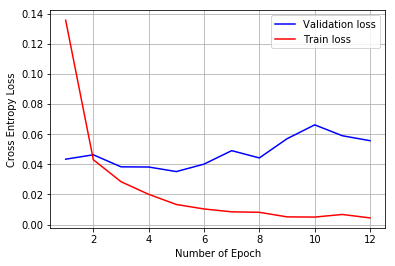

In [0]:
score = MODEL_2.evaluate(X_TEST, Y_TEST, verbose=0)
TEST_LOSS.append(score[0])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

import matplotlib.pyplot as plt
TRAIN_LOSS = HISTORY_2.history['loss']
VAL_LOSS = HISTORY_2.history['val_loss']
PLOT(VAL_LOSS,TRAIN_LOSS)

# MODEL 3:

* It is same as model1,but we changed optimizer,activation function and Kernel size

Filter_1:32

FIlter_2 :64


Kerenel_size=5X5

Activation Function: Sigmoid

Optimizers: Adadelta
 



In [0]:
MODEL_3 = Sequential()
MODEL_3.add(Conv2D(32,kernel_size=(5,5),activation='sigmoid',input_shape=(28,28,1)))
MODEL_3.add(Conv2D(64,kernel_size=(5,5),activation='sigmoid'))

MODEL_3.add(Flatten())
MODEL_3.add(Dense(10,activation = 'softmax'))
MODEL_3.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [0]:
HISTORY_3=MODEL_3.fit(X_TRAIN,Y_TRAIN,batch_size= 128,epochs=12,verbose=1,validation_data=(X_TEST,Y_TEST))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 223s 4ms/step - loss: 1.2256 - acc: 0.6181 - val_loss: 0.2915 - val_acc: 0.9143
Epoch 2/12
60000/60000 [==============================] - 223s 4ms/step - loss: 0.2130 - acc: 0.9371 - val_loss: 0.1328 - val_acc: 0.9607
Epoch 3/12
60000/60000 [==============================] - 224s 4ms/step - loss: 0.1187 - acc: 0.9651 - val_loss: 0.0844 - val_acc: 0.9729
Epoch 4/12
60000/60000 [==============================] - 223s 4ms/step - loss: 0.0866 - acc: 0.9741 - val_loss: 0.0709 - val_acc: 0.9761
Epoch 5/12
60000/60000 [==============================] - 224s 4ms/step - loss: 0.0709 - acc: 0.9786 - val_loss: 0.0607 - val_acc: 0.9808
Epoch 6/12
60000/60000 [==============================] - 223s 4ms/step - loss: 0.0607 - acc: 0.9817 - val_loss: 0.0602 - val_acc: 0.9811
Epoch 7/12
60000/60000 [==============================] - 222s 4ms/step - loss: 0.0540 - acc: 0.9840 - val_loss: 0.0649 - 

Test loss: 0.052183368785283527
Test accuracy: 0.9822


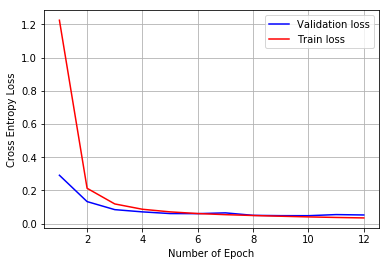

In [0]:
score = MODEL_3.evaluate(X_TEST, Y_TEST, verbose=0)
TEST_LOSS.append(score[0])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

import matplotlib.pyplot as plt
TRAIN_LOSS = HISTORY_3.history['loss']
VAL_LOSS = HISTORY_3.history['val_loss']
PLOT(VAL_LOSS,TRAIN_LOSS)

# MODEL_4:

* What will happen If I do Maxpooling and Dropout in MoDEL_3?

Filter_1:32

FIlter_2 :64


Kerenel_size=5X5

Activation Function: Sigmoid

Optimizers: Adadelta

Maxpooling : Pool_size=(2X2)

Dropout _rate = 0.3

In [0]:
MODEL_4 = Sequential()
MODEL_4.add(Conv2D(32,kernel_size=(5,5),activation='sigmoid',input_shape=(28,28,1)))
MODEL_4.add(MaxPooling2D(pool_size=(2, 2)))
MODEL_4.add(Dropout(0.3))

MODEL_4.add(Conv2D(64,kernel_size=(5,5),activation='sigmoid'))
MODEL_4.add(MaxPooling2D(pool_size=(2, 2)))
MODEL_4.add(Dropout(0.3))

MODEL_4.add(Flatten())
MODEL_4.add(Dense(10,activation = 'softmax'))
MODEL_4.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

W0902 06:31:11.854401 140422688589696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0902 06:31:11.866156 140422688589696 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
HISTORY_4=MODEL_4.fit(X_TRAIN,Y_TRAIN,batch_size= 128,epochs=12,verbose=1,validation_data=(X_TEST,Y_TEST))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 61s 1ms/step - loss: 1.1726 - acc: 0.5917 - val_loss: 0.2891 - val_acc: 0.9155
Epoch 2/12
60000/60000 [==============================] - 61s 1ms/step - loss: 0.2503 - acc: 0.9245 - val_loss: 0.1423 - val_acc: 0.9564
Epoch 3/12
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1567 - acc: 0.9525 - val_loss: 0.0941 - val_acc: 0.9718
Epoch 4/12
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1204 - acc: 0.9636 - val_loss: 0.0753 - val_acc: 0.9769
Epoch 5/12
60000/60000 [==============================] - 60s 1ms/step - loss: 0.1035 - acc: 0.9678 - val_loss: 0.0634 - val_acc: 0.9800
Epoch 6/12
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0906 - acc: 0.9719 - val_loss: 0.0551 - val_acc: 0.9827
Epoch 7/12
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0820 - acc: 0.9744 - val_loss: 0.0506 - val_acc

Test loss: 0.03925352229541167
Test accuracy: 0.9873


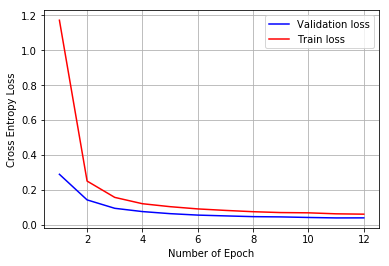

In [0]:
score = MODEL_4.evaluate(X_TEST, Y_TEST, verbose=0)
TEST_LOSS.append(score[0])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

import matplotlib.pyplot as plt
TRAIN_LOSS = HISTORY_4.history['loss']
VAL_LOSS = HISTORY_4.history['val_loss']
PLOT(VAL_LOSS,TRAIN_LOSS)

# MODEL_5:

* What if ,we add Maxpooling,Batch Normalization ,Dropout in model_3

In [0]:
MODEL_5 = Sequential()
MODEL_5.add(Conv2D(32,kernel_size=(5,5),activation='sigmoid',input_shape=(28,28,1)))
MODEL_5.add(BatchNormalization(axis=-1))
MODEL_5.add(Dropout(0.3))
MODEL_5.add(MaxPooling2D(pool_size=(2, 2)))

MODEL_5.add(Conv2D(64,kernel_size=(5,5),activation='sigmoid'))
MODEL_5.add(BatchNormalization(axis=-1))
MODEL_5.add(Dropout(0.3))
MODEL_5.add(MaxPooling2D(pool_size=(2, 2)))

MODEL_5.add(Flatten())
MODEL_5.add(Dense(10,activation = 'softmax'))
MODEL_5.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

W0902 06:43:33.402087 140422688589696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2041: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



In [0]:
HISTORY_5=MODEL_5.fit(X_TRAIN,Y_TRAIN,batch_size= 128,epochs=12,verbose=1,validation_data=(X_TEST,Y_TEST))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 111s 2ms/step - loss: 0.1847 - acc: 0.9425 - val_loss: 0.2297 - val_acc: 0.9294
Epoch 2/12
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0641 - acc: 0.9798 - val_loss: 0.1932 - val_acc: 0.9350
Epoch 3/12
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0462 - acc: 0.9857 - val_loss: 0.0690 - val_acc: 0.9784
Epoch 4/12
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0377 - acc: 0.9879 - val_loss: 0.2746 - val_acc: 0.9272
Epoch 5/12
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0314 - acc: 0.9903 - val_loss: 0.4505 - val_acc: 0.9058
Epoch 6/12
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0274 - acc: 0.9915 - val_loss: 0.1589 - val_acc: 0.9529
Epoch 7/12
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0250 - acc: 0.9923 - val_loss: 0.1460 - 

Test loss: 0.20177652775691823
Test accuracy: 0.9527


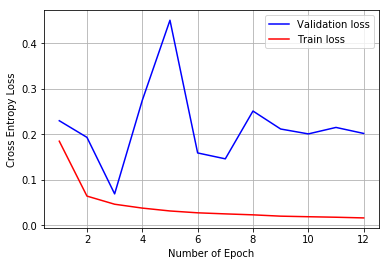

In [0]:
score = MODEL_5.evaluate(X_TEST, Y_TEST, verbose=0)
TEST_LOSS.append(score[0])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

import matplotlib.pyplot as plt
TRAIN_LOSS = HISTORY_5.history['loss']
VAL_LOSS = HISTORY_5.history['val_loss']
PLOT(VAL_LOSS,TRAIN_LOSS)

# MODEL:6




Filter_1:20

FIlter_2 :40

Filter_3 : 60

Kerenel_size=7X7

Activation Function: Relu

Optimizers: Adamax

Maxpooling : Pool_size=(4X4)

Dropout _rate = 0.3

In [0]:
MODEL_6 = Sequential()
MODEL_6.add(Conv2D(20,kernel_size=(1,1),activation='relu',input_shape=(28,28,1)))
MODEL_6.add(BatchNormalization(axis=-1))
MODEL_6.add(Dropout(0.3))
MODEL_6.add(MaxPooling2D(pool_size=(2, 2)))

MODEL_6.add(Conv2D(40,kernel_size=(1,1),activation='relu'))
MODEL_6.add(BatchNormalization(axis=-1))
MODEL_6.add(Dropout(0.3))
MODEL_6.add(MaxPooling2D(pool_size=(2, 2)))

MODEL_6.add(Conv2D(60,kernel_size=(1,1),activation='relu'))
MODEL_6.add(BatchNormalization(axis=-1))
MODEL_6.add(Dropout(0.3))
MODEL_6.add(MaxPooling2D(pool_size=(2, 2)))

MODEL_6.add(Flatten())
MODEL_6.add(Dense(10,activation = 'softmax'))
MODEL_6.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adamax(),metrics=['accuracy'])

In [0]:
HISTORY_6=MODEL_6.fit(X_TRAIN,Y_TRAIN,batch_size= 128,epochs=12,verbose=1,validation_data=(X_TEST,Y_TEST))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 96s 2ms/step - loss: 1.6944 - acc: 0.4547 - val_loss: 1.9518 - val_acc: 0.4278
Epoch 2/12
60000/60000 [==============================] - 93s 2ms/step - loss: 1.1886 - acc: 0.5951 - val_loss: 1.5735 - val_acc: 0.5034
Epoch 3/12
60000/60000 [==============================] - 93s 2ms/step - loss: 1.0886 - acc: 0.6330 - val_loss: 1.5932 - val_acc: 0.5088
Epoch 4/12
60000/60000 [==============================] - 92s 2ms/step - loss: 1.0303 - acc: 0.6546 - val_loss: 1.8886 - val_acc: 0.4533
Epoch 5/12
60000/60000 [==============================] - 91s 2ms/step - loss: 0.9855 - acc: 0.6723 - val_loss: 2.4355 - val_acc: 0.3900
Epoch 6/12
60000/60000 [==============================] - 88s 1ms/step - loss: 0.9623 - acc: 0.6814 - val_loss: 2.7681 - val_acc: 0.3699
Epoch 7/12
60000/60000 [==============================] - 88s 1ms/step - loss: 0.9395 - acc: 0.6896 - val_loss: 3.3672 - val_acc

Test loss: 3.4551548400878906
Test accuracy: 0.3408


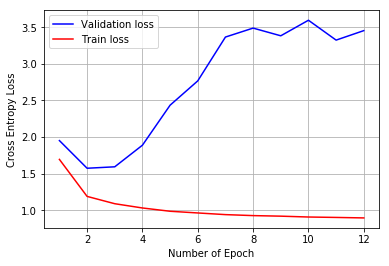

In [0]:
score = MODEL_6.evaluate(X_TEST, Y_TEST, verbose=0)
TEST_LOSS.append(score[0])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

import matplotlib.pyplot as plt
TRAIN_LOSS = HISTORY_6.history['loss']
VAL_LOSS = HISTORY_6.history['val_loss']
PLOT(VAL_LOSS,TRAIN_LOSS)

# MODEL:7







Filter_1:10

FIlter_2 :30


Kerenel_size=7X7

Activation Function: tanh

Optimizers: Adam

Maxpooling : Pool_size=(4X4)

BATCH_NORMALIZTION

Dropout _rate = 0.3

Two MLP layer(sigmoid activation) followed by output layer having softmax activation.

In [0]:
MODEL_7 = Sequential()
MODEL_7.add(Conv2D(20,kernel_size=(3,3),activation='tanh',input_shape=(28,28,1)))
MODEL_7.add(BatchNormalization(axis=-1))
MODEL_7.add(Dropout(0.3))
MODEL_7.add(MaxPooling2D(pool_size=(4, 4)))

MODEL_7.add(Conv2D(40,kernel_size=(3,3),activation='tanh'))
MODEL_7.add(BatchNormalization(axis=-1))
MODEL_7.add(Dropout(0.3))
MODEL_7.add(MaxPooling2D(pool_size=(4, 4)))



MODEL_7.add(Flatten())
MODEL_7.add(Dense(40,activation = 'sigmoid'))
MODEL_7.add(Dense(20,activation = 'sigmoid'))
MODEL_7.add(Dense(10,activation = 'softmax'))
MODEL_7.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [0]:
HISTORY_7=MODEL_7.fit(X_TRAIN,Y_TRAIN,batch_size= 128,epochs=12,verbose=1,validation_data=(X_TEST,Y_TEST))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 58s 959us/step - loss: 1.4654 - acc: 0.6418 - val_loss: 1.3534 - val_acc: 0.5442
Epoch 2/12
60000/60000 [==============================] - 56s 937us/step - loss: 0.5174 - acc: 0.8931 - val_loss: 0.7975 - val_acc: 0.7461
Epoch 3/12
60000/60000 [==============================] - 56s 936us/step - loss: 0.3076 - acc: 0.9238 - val_loss: 0.7459 - val_acc: 0.7648
Epoch 4/12
60000/60000 [==============================] - 56s 935us/step - loss: 0.2349 - acc: 0.9374 - val_loss: 0.5748 - val_acc: 0.8166
Epoch 5/12
60000/60000 [==============================] - 56s 936us/step - loss: 0.2027 - acc: 0.9435 - val_loss: 0.6626 - val_acc: 0.7893
Epoch 6/12
60000/60000 [==============================] - 56s 936us/step - loss: 0.1758 - acc: 0.9502 - val_loss: 0.5220 - val_acc: 0.8417
Epoch 7/12
60000/60000 [==============================] - 56s 939us/step - loss: 0.1649 - acc: 0.9537 - val_loss: 0.

Test loss: 0.45748621554374697
Test accuracy: 0.8597


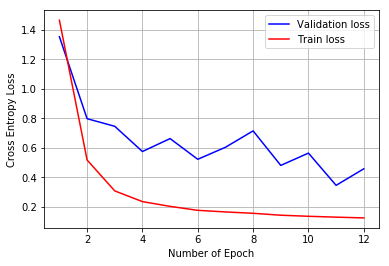

In [0]:
score = MODEL_7.evaluate(X_TEST, Y_TEST, verbose=0)
TEST_LOSS.append(score[0])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

import matplotlib.pyplot as plt
TRAIN_LOSS = HISTORY_7.history['loss']
VAL_LOSS = HISTORY_7.history['val_loss']
PLOT(VAL_LOSS,TRAIN_LOSS)

# MODEL:8

In [0]:
MODEL_8 = Sequential()
MODEL_8.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
MODEL_8.add(BatchNormalization(axis=-1))
MODEL_8.add(Dropout(0.4))
MODEL_8.add(MaxPooling2D(pool_size=(4, 4)))

MODEL_8.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
MODEL_8.add(BatchNormalization(axis=-1))
MODEL_8.add(Dropout(0.4))
MODEL_8.add(MaxPooling2D(pool_size=(4, 4)))



MODEL_8.add(Flatten())
MODEL_8.add(Dense(60,activation = 'relu'))
MODEL_8.add(Dense(40,activation = 'relu'))
MODEL_8.add(Dense(10,activation = 'softmax'))
MODEL_8.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [0]:
HISTORY_8=MODEL_8.fit(X_TRAIN,Y_TRAIN,batch_size= 128,epochs=12,verbose=1,validation_data=(X_TEST,Y_TEST))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 165s 3ms/step - loss: 0.3043 - acc: 0.9050 - val_loss: 0.3595 - val_acc: 0.8986
Epoch 2/12
60000/60000 [==============================] - 167s 3ms/step - loss: 0.1075 - acc: 0.9672 - val_loss: 0.1626 - val_acc: 0.9699
Epoch 3/12
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0805 - acc: 0.9754 - val_loss: 0.1512 - val_acc: 0.9685
Epoch 4/12
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0701 - acc: 0.9783 - val_loss: 0.1250 - val_acc: 0.9709
Epoch 5/12
60000/60000 [==============================] - 162s 3ms/step - loss: 0.0625 - acc: 0.9802 - val_loss: 0.1329 - val_acc: 0.9670
Epoch 6/12
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0580 - acc: 0.9825 - val_loss: 0.1546 - val_acc: 0.9560
Epoch 7/12
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0518 - acc: 0.9833 - val_loss: 0.1020 - 

Test loss: 0.1496657036446035
Test accuracy: 0.9696


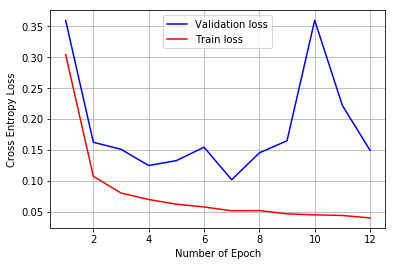

In [0]:
score = MODEL_8.evaluate(X_TEST, Y_TEST, verbose=0)
TEST_LOSS.append(score[0])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

import matplotlib.pyplot as plt
TRAIN_LOSS = HISTORY_8.history['loss']
VAL_LOSS = HISTORY_8.history['val_loss']
PLOT(VAL_LOSS,TRAIN_LOSS)



# MODEL:9

In [9]:
MODEL_9 = Sequential()
MODEL_9.add(Conv2D(128,kernel_size=(1,1),activation='relu',input_shape=(28,28,1)))
MODEL_9.add(BatchNormalization(axis=-1))
MODEL_9.add(Dropout(0.4))
MODEL_9.add(MaxPooling2D(pool_size=(2, 2)))

MODEL_9.add(Conv2D(256,kernel_size=(1,1),activation='relu'))
MODEL_9.add(BatchNormalization(axis=-1))
MODEL_9.add(Dropout(0.4))
MODEL_9.add(MaxPooling2D(pool_size=(2, 2)))



MODEL_9.add(Flatten())
MODEL_9.add(Dense(60,activation = 'relu'))
MODEL_9.add(Dense(30,activation = 'relu'))
MODEL_9.add(Dense(10,activation = 'softmax'))
MODEL_9.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

W0902 15:56:29.891176 140115145213824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0902 15:56:29.934309 140115145213824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0902 15:56:29.941558 140115145213824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0902 15:56:29.996532 140115145213824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0902 15:56:29.997814 1401151452

In [10]:
HISTORY_9=MODEL_9.fit(X_TRAIN,Y_TRAIN,batch_size= 128,epochs=12,verbose=1,validation_data=(X_TEST,Y_TEST))

W0902 15:56:36.269253 140115145213824 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 529s 9ms/step - loss: 0.7268 - acc: 0.7834 - val_loss: 1.7188 - val_acc: 0.5333
Epoch 2/12
60000/60000 [==============================] - 533s 9ms/step - loss: 0.3982 - acc: 0.8770 - val_loss: 2.1108 - val_acc: 0.4681
Epoch 3/12
60000/60000 [==============================] - 529s 9ms/step - loss: 0.3496 - acc: 0.8918 - val_loss: 2.0650 - val_acc: 0.5157
Epoch 4/12
60000/60000 [==============================] - 533s 9ms/step - loss: 0.3180 - acc: 0.9008 - val_loss: 6.4830 - val_acc: 0.2923
Epoch 5/12
60000/60000 [==============================] - 536s 9ms/step - loss: 0.2942 - acc: 0.9083 - val_loss: 7.1578 - val_acc: 0.2687
Epoch 6/12
60000/60000 [==============================] - 535s 9ms/step - loss: 0.2804 - acc: 0.9122 - val_loss: 6.9064 - val_acc: 0.2480
Epoch 7/12
60000/60000 [==============================] - 530s 9ms/step - loss: 0.2732 - acc: 0.9142 - val_loss: 8.3281 - 

Test loss: 10.427624143981934
Test accuracy: 0.1527


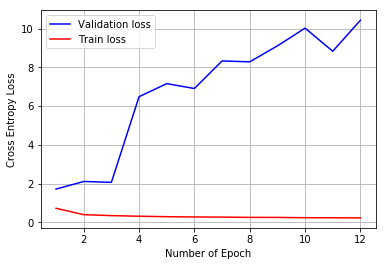

In [13]:
score = MODEL_9.evaluate(X_TEST, Y_TEST, verbose=0)
#TEST_LOSS.apscore = MODEL_9.evaluate(X_TEST, Y_TEST, verbose=0)
#TEST_LOSS.append(score[0])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

import matplotlib.pyplot as plt
TRAIN_LOSS = HISTORY_9.history['loss']
VAL_LOSS = HISTORY_9.history['val_loss']
PLOT(VAL_LOSS,TRAIN_LOSS)






BN = BatchNormalization

Do = Dropout

MP = maxpooling

In [5]:
from prettytable import PrettyTable
X=PrettyTable()
print(" "*40+"CONCLUSION")
print("="*100)
X.field_names = ["Model",'Number of Filters','Kernel_Size','Activation','Optimizer',"Test Loss"]
X.add_row(["1",'Filter1:32,Filter2:64',"3X3","Relu",'Adam','0.065'])
X.add_row(["2",'Filter1:32,Filter2:64,Filter3:128',"3X3","Relu",'Adam','0.055'])
X.add_row(["3",'Filter1:32,Filter2:64',"5X5","Sigmoid ",'Adadelta','0.052'])
X.add_row(["4(MP+DO(0.3))",'Filter1:32,Filter2:64',"5X5","Sigmoid",'Adadelta','0.039'])
X.add_row(["5(BN+DO+MP(2,2))",'Same as Above',"5X5","Sigmoid ",'Adadelta','0.201'])
X.add_row(["6(BN+DO+MP(2,2))",'Filter1:20,Filter2:40,Filter3:60',"1X1","Relu ",'Adamax','3.455'])
X.add_row(["7(BN+DO+MP(4,4))+2MLP+Sigmoid",'Filter1:20,Filter2:30',"3X3","tanh ",'Adam','0.457'])
X.add_row(["8(BN+DO+MP(4,4))+2MLP+relu",'Filter1:64,Filter2:128',"3X3","Relu ",'Adam','0.149'])
X.add_row(["9(BN+DO+MP(2,2))+2MLP+relu",'Filter1:128,Filter2:256',"1X1","Relu ",'Adam','10.42'])




print(X)

                                        CONCLUSION
+-------------------------------+-----------------------------------+-------------+------------+-----------+-----------+
|             Model             |         Number of Filters         | Kernel_Size | Activation | Optimizer | Test Loss |
+-------------------------------+-----------------------------------+-------------+------------+-----------+-----------+
|               1               |       Filter1:32,Filter2:64       |     3X3     |    Relu    |    Adam   |   0.065   |
|               2               | Filter1:32,Filter2:64,Filter3:128 |     3X3     |    Relu    |    Adam   |   0.055   |
|               3               |       Filter1:32,Filter2:64       |     5X5     |  Sigmoid   |  Adadelta |   0.052   |
|         4(MP+DO(0.3))         |       Filter1:32,Filter2:64       |     5X5     |  Sigmoid   |  Adadelta |   0.039   |
|        5(BN+DO+MP(2,2))       |           Same as Above           |     5X5     |  Sigmoid   |  Adad

# Conclusion:

General Thumb rule to check perfomance of model

 * If Train loss is too high than validation loss we say that Model is Underfit.

*   If Train Loss is too low than validation loss then Model is Overfit.

*   What we want in Our Model is that both this loss should be low and approximatly close to each other.




---


1.   In very first two model I tried to expriment with number of filters,keeping acyivation,optimizers and kernel size same.
2.   In first model,in first layer our model learn 32 fiter and in second layer it learned 64 filter.
3. In secon model, it has learn three layer of model,in first layer our model learn 32 filter in secon 64 filter and in third layer 128 filters.
4. What I observe from first two model is if increase number of filter keeping kernel size ,activation function,optimizers same, our model test loss will decrease.(It has decrease from 0.65 to 0.55)


---








---


1.   In my third model we learn same number of filter in both layer as we did in first model,but we change kernel size from (3X3) to (5X5) and used activation function as sigmoid and optimizer Adadelta.
2.   By just changing kernel size and activation function and optimizers keeping number of filter same our model test loss decrease significantly as compared to first and second model.


---






---



*   In 4th model we keep all parameters same as previous,we just did maxpooling follwed by dropout(0.3)  and what I observe is test loss again decreases significantly from 0.052(in model 3) to 0.039.


---







---



*   Model 5 is exactly similar to model 4 except that I did BatchNormalization in this model,again test loss decreases.
* Maxpooling reduce spatial dimension i.e our model has to learn now less parameters and doing dropout somewhat ensure that our model is not overfitting.






---

* Kernel Size we will use  in our model will affect perfomance of model a Lot,this is what I observe from Model6.
* What I did in Model6 is I have use Relu activation and Adamax Optimizer,our model learned 3 layers of filter having size 20,40,60,we also did batchnormalization ,Maxpooling and dropout(to reduce overfitting,but we used here kernel size of (1X1).
* Our Testloss is higher in this case as compared to all previous model.


---





---



*   In Model(7,8,9), I expriment with our MLP layer(after Flatten),in model 7 I have used two hidden layer of sigmoid activation and in model 8and 9 two hidden layer of relu activation,In all model we did BatchNormalization maxpooling and dropout used differnent number of kernel and learned diffnerent number of filter .
* Like in model7,8 we used kernel size of (3X3) and in model 9 we used kernel size of (1X1) our model perfomance decrease because test loss when we used kernal size of 1X1 is very high(Validation loss is just increasing in that case)



---




